In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

from tqdm import tqdm

random_seed = 42

In [2]:
df = pd.read_csv("train.csv")

df

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,3,3,4,10,4,5,5,7,10,...,7,8,7,2,2,1,4,6,4,0.495
1117953,1117953,2,2,4,3,9,5,8,1,3,...,9,4,4,3,7,4,9,4,5,0.480
1117954,1117954,7,3,9,4,6,5,9,1,3,...,5,5,5,5,6,5,5,2,4,0.485
1117955,1117955,7,3,3,7,5,2,3,4,6,...,6,8,5,3,4,6,7,6,4,0.495


In [3]:
df = df.drop("id", axis=1)

In [4]:
train_columns = list(df.columns[: -1])

len(train_columns)

20

In [5]:
dataset_size = df.shape[0]

for feature in train_columns:
    feat_val_counts = df[feature].value_counts()
    const_count = feat_val_counts[0]
    if const_count > 0.1 * dataset_size:
        print(f"feature {feature} has {const_count / dataset_size} constants")
    print(f"{feature} dtype: {df[feature].dtype}; count of values: {len(feat_val_counts)}")

MonsoonIntensity dtype: int64; count of values: 17
TopographyDrainage dtype: int64; count of values: 19
RiverManagement dtype: int64; count of values: 17
Deforestation dtype: int64; count of values: 18
Urbanization dtype: int64; count of values: 18
ClimateChange dtype: int64; count of values: 18
DamsQuality dtype: int64; count of values: 17
Siltation dtype: int64; count of values: 17
AgriculturalPractices dtype: int64; count of values: 17
Encroachments dtype: int64; count of values: 19
IneffectiveDisasterPreparedness dtype: int64; count of values: 17
DrainageSystems dtype: int64; count of values: 18
CoastalVulnerability dtype: int64; count of values: 18
Landslides dtype: int64; count of values: 17
Watersheds dtype: int64; count of values: 17
DeterioratingInfrastructure dtype: int64; count of values: 18
PopulationScore dtype: int64; count of values: 19
WetlandLoss dtype: int64; count of values: 20
InadequatePlanning dtype: int64; count of values: 17
PoliticalFactors dtype: int64; count 

In [6]:
df.isna().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [7]:
df.shape

(1117957, 21)

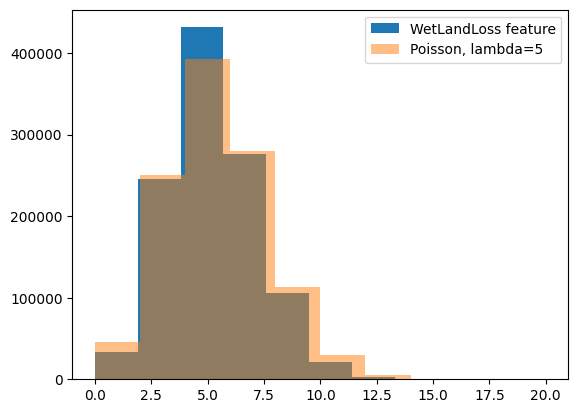

In [8]:
plt.hist(df["WetlandLoss"], label="WetLandLoss feature")
s = np.random.poisson(5, df.shape[0])
plt.hist(s, label="Poisson, lambda=5", alpha=0.5)
plt.legend()

plt.show()

In [9]:
df[train_columns].describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,4.949230e+00,4.945239e+00,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00
std,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,2.083324e+00,2.078141e+00,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00
50%,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
75%,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00
max,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01


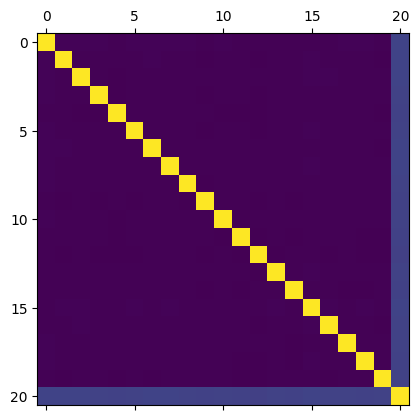

In [10]:
plt.matshow(df[train_columns + ["FloodProbability"]].corr())
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[train_columns], df["FloodProbability"], test_size=0.33, random_state=random_seed)

In [12]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

LinearRegression()

In [13]:
r2_score(y_test, model_lr.predict(X_test))

0.8448724001341279

In [14]:
model_lr.coef_

array([0.00560687, 0.0056393 , 0.00565652, 0.00568818, 0.0056551 ,
       0.00566178, 0.00565922, 0.00564499, 0.00564245, 0.00565212,
       0.00564171, 0.00563444, 0.00566145, 0.00563986, 0.00564459,
       0.00561457, 0.00568788, 0.00563606, 0.0056094 , 0.00564303])

In [15]:
df_wsum = df[train_columns].sum(axis=1) * 0.00528

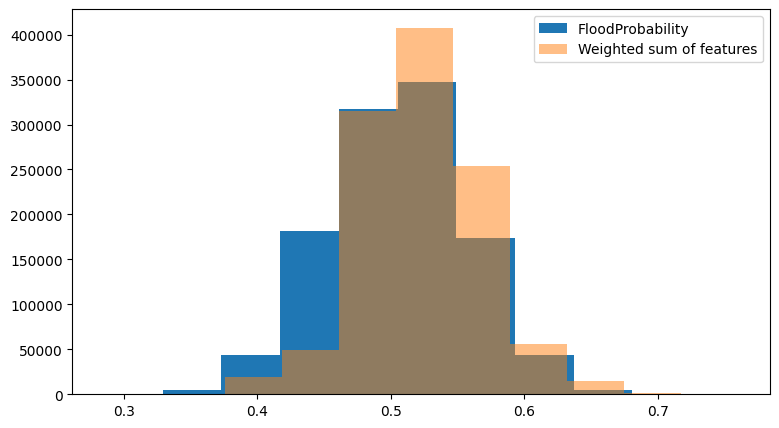

In [16]:
plt.figure(figsize=(9, 5))
plt.hist(df["FloodProbability"], label="FloodProbability")
plt.hist(df_wsum, alpha=0.5, label="Weighted sum of features")

plt.legend()

plt.show()

In [17]:
from catboost import CatBoostClassifier

model_catboost_base = CatBoostClassifier(random_seed=random_seed, loss_function="CrossEntropy", cat_features=train_columns, task_type="GPU")

model_catboost_base.fit(X_train, y_train)

0:	learn: 0.6930971	total: 224ms	remaining: 3m 43s
1:	learn: 0.6930526	total: 420ms	remaining: 3m 29s
2:	learn: 0.6930051	total: 614ms	remaining: 3m 24s
3:	learn: 0.6929599	total: 812ms	remaining: 3m 22s
4:	learn: 0.6929142	total: 999ms	remaining: 3m 18s
5:	learn: 0.6928704	total: 1.19s	remaining: 3m 17s
6:	learn: 0.6928270	total: 1.38s	remaining: 3m 16s
7:	learn: 0.6927843	total: 1.56s	remaining: 3m 14s
8:	learn: 0.6927426	total: 1.76s	remaining: 3m 13s
9:	learn: 0.6927008	total: 1.95s	remaining: 3m 13s
10:	learn: 0.6926609	total: 2.14s	remaining: 3m 12s
11:	learn: 0.6926207	total: 2.34s	remaining: 3m 12s
12:	learn: 0.6925815	total: 2.54s	remaining: 3m 12s
13:	learn: 0.6925431	total: 2.73s	remaining: 3m 12s
14:	learn: 0.6925049	total: 2.92s	remaining: 3m 11s
15:	learn: 0.6924671	total: 3.11s	remaining: 3m 11s
16:	learn: 0.6924288	total: 3.3s	remaining: 3m 10s
17:	learn: 0.6923927	total: 3.49s	remaining: 3m 10s
18:	learn: 0.6923570	total: 3.68s	remaining: 3m 10s
19:	learn: 0.6923209	to

In [18]:
r2_score(y_test, model_catboost_base.predict_proba(X_test)[:, -1])

0.8410339072095224

<BarContainer object of 20 artists>

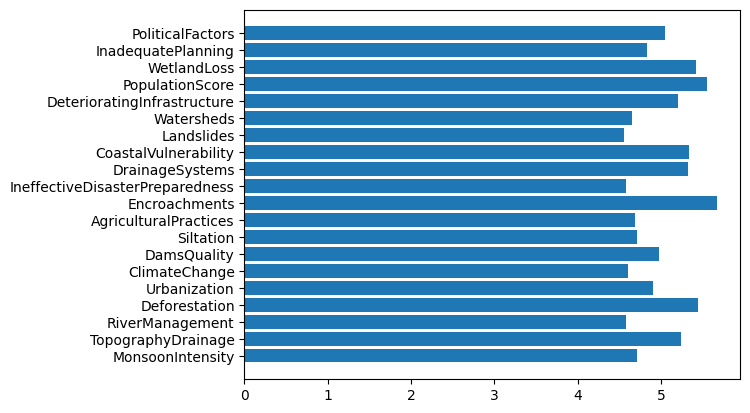

In [19]:
plt.barh(train_columns, model_catboost_base.feature_importances_)

In [20]:
model_catboost_feat_select = CatBoostClassifier(random_seed=random_seed, loss_function="CrossEntropy", task_type="GPU")

model_catboost_feat_select.select_features(X_train, y_train, features_for_select=train_columns, num_features_to_select=10, algorithm="RecursiveByShapValues")

Step #1 out of 1
0:	learn: 0.6930982	total: 23ms	remaining: 22.9s
1:	learn: 0.6930526	total: 39.8ms	remaining: 19.8s
2:	learn: 0.6930060	total: 55.6ms	remaining: 18.5s
3:	learn: 0.6929606	total: 72.6ms	remaining: 18.1s
4:	learn: 0.6929165	total: 88.4ms	remaining: 17.6s
5:	learn: 0.6928725	total: 104ms	remaining: 17.3s
6:	learn: 0.6928308	total: 121ms	remaining: 17.2s
7:	learn: 0.6927879	total: 139ms	remaining: 17.2s
8:	learn: 0.6927467	total: 156ms	remaining: 17.1s
9:	learn: 0.6927063	total: 172ms	remaining: 17s
10:	learn: 0.6926670	total: 189ms	remaining: 17s
11:	learn: 0.6926268	total: 205ms	remaining: 16.9s
12:	learn: 0.6925884	total: 222ms	remaining: 16.9s
13:	learn: 0.6925516	total: 239ms	remaining: 16.9s
14:	learn: 0.6925132	total: 255ms	remaining: 16.8s
15:	learn: 0.6924758	total: 270ms	remaining: 16.6s
16:	learn: 0.6924407	total: 284ms	remaining: 16.4s
17:	learn: 0.6924048	total: 297ms	remaining: 16.2s
18:	learn: 0.6923696	total: 311ms	remaining: 16.1s
19:	learn: 0.6923347	tota

{'selected_features': [1, 2, 5, 6, 7, 10, 13, 16, 17, 19],
 'eliminated_features_names': ['MonsoonIntensity',
  'DeterioratingInfrastructure',
  'DrainageSystems',
  'InadequatePlanning',
  'Encroachments',
  'CoastalVulnerability',
  'AgriculturalPractices',
  'Deforestation',
  'Watersheds',
  'Urbanization'],
 'loss_graph': {'main_indices': [0, 10],
  'removed_features_count': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  'loss_values': [0.6886949296469436,
   0.6889520797322374,
   0.6892074172406847,
   0.6894593912031842,
   0.6897067306389204,
   0.689948660611055,
   0.690183551393987,
   0.6904151473291672,
   0.6906435629546522,
   0.6908669923119,
   0.6910861026821469]},
 'eliminated_features': [0, 15, 11, 18, 9, 12, 8, 3, 14, 4],
 'selected_features_names': ['TopographyDrainage',
  'RiverManagement',
  'ClimateChange',
  'DamsQuality',
  'Siltation',
  'IneffectiveDisasterPreparedness',
  'Landslides',
  'PopulationScore',
  'WetlandLoss',
  'PoliticalFactors']}

In [21]:
r2_score(y_test, model_catboost_feat_select.predict_proba(X_test)[:, -1])

0.3815656760584861

In [22]:
df['sum'] = df[train_columns].sum(axis=1)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[train_columns + ['sum']], df["FloodProbability"], test_size=0.33, random_state=random_seed)

In [24]:
from catboost import CatBoostClassifier

model_catboost_sum = CatBoostClassifier(random_seed=random_seed, loss_function="CrossEntropy", task_type="GPU")

model_catboost_sum.fit(X_train, y_train)

0:	learn: 0.6928868	total: 27.3ms	remaining: 27.2s
1:	learn: 0.6926401	total: 44.5ms	remaining: 22.2s
2:	learn: 0.6924092	total: 60.5ms	remaining: 20.1s
3:	learn: 0.6921919	total: 78.1ms	remaining: 19.4s
4:	learn: 0.6919861	total: 96.1ms	remaining: 19.1s
5:	learn: 0.6917912	total: 110ms	remaining: 18.1s
6:	learn: 0.6916089	total: 122ms	remaining: 17.4s
7:	learn: 0.6914373	total: 135ms	remaining: 16.8s
8:	learn: 0.6912742	total: 149ms	remaining: 16.4s
9:	learn: 0.6911214	total: 162ms	remaining: 16s
10:	learn: 0.6909782	total: 176ms	remaining: 15.9s
11:	learn: 0.6908417	total: 189ms	remaining: 15.6s
12:	learn: 0.6907137	total: 202ms	remaining: 15.3s
13:	learn: 0.6905936	total: 215ms	remaining: 15.1s
14:	learn: 0.6904797	total: 228ms	remaining: 15s
15:	learn: 0.6903729	total: 241ms	remaining: 14.8s
16:	learn: 0.6902709	total: 259ms	remaining: 15s
17:	learn: 0.6901757	total: 276ms	remaining: 15.1s
18:	learn: 0.6900866	total: 293ms	remaining: 15.1s
19:	learn: 0.6900013	total: 310ms	remainin

In [25]:
r2_score(y_test, model_catboost_sum.predict_proba(X_test)[:, -1])

0.8668712623660143

In [26]:
model_catboost_base.feature_importances_

array([4.71448578, 5.23350066, 4.5751652 , 5.44243853, 4.90367619,
       4.60476589, 4.97801187, 4.70628376, 4.68001365, 5.66795952,
       4.58381043, 5.32503111, 5.33654677, 4.55215347, 4.64893625,
       5.19627513, 5.54590435, 5.42079932, 4.83433376, 5.04990835])